In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import the xlsx file
data = pd.read_excel("Cleaned Data.xlsx", sheet_name = "Data")
list(data.keys())

['Article_title',
 'Article_link',
 'General_outcome',
 'General_outcome (1,0)',
 'Desc_general_outcome',
 'Daily_intake',
 'Descr_daily_intake',
 'Health_outcome',
 'Descr_health_outcome',
 'Environmental_outcome',
 'Descr_environmental_outcome',
 'Fund_source',
 'Fund_Source',
 'Author_affiliation',
 'Loc_authors',
 'Loc_experiment',
 'Year',
 'Journal',
 'Loc_journal',
 'Loc_editor_journal',
 'Current Impact_Factor',
 'Impact_F_Publishing_Year',
 'Num_Citations']

In [2]:
# remove extraneous spaces and standardize capitalization
strip_cols = ["Fund_source", "Fund_Source", "Loc_authors","Loc_experiment", 
              "Loc_journal", "Loc_editor_journal"]
for key in strip_cols:
    data[key] = data[key].str.strip().str.upper()

In [3]:
#transform outcomes to indicator variables
outcomes = ["Health_outcome", "Environmental_outcome"]
for outcome in outcomes:
    data[outcome][data[outcome].str.strip().str.title()=="Yes"] = 1
    data[outcome][data[outcome].str.strip().str.title()=="No"] = 0
    data[outcome].fillna(0, inplace = True)
    
# create column that combines environmental and health outcomes
# if value from either column is 1, entry in Either_outcome is 1, else 0
data["General_outcome"] = 0
data["General_outcome"][data["Health_outcome"] ==1] = 1
data["General_outcome"][data["Environmental_outcome"] ==1] = 1

C:\Users\JLCat\AppData\Local\Temp/ipykernel_21612/4013827077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outcome][data[outcome].str.strip().str.title()=="Yes"] = 1
C:\Users\JLCat\AppData\Local\Temp/ipykernel_21612/4013827077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outcome][data[outcome].str.strip().str.title()=="No"] = 0
C:\Users\JLCat\AppData\Local\Temp/ipykernel_21612/4013827077.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [4]:
def create_indicators(data, column_names):

    # create a dictionary with the set of possible responses for each heading in the headings list
    indicator_responses = {heading : sorted(list(set(data[heading]))) for heading in headings}

    # cycle through the heading and possible responses
    for heading, responses in indicator_responses.items():

        # for each possible response, create a new column
        for response in responses:
            # make all values in that column 0 by default
            data[response] = 0
            # identify the subset of data where the data in the row matches response
            # make values in that column 1 if their response matches the response 
            # in the original column of data
            data[response][data[heading] == response] = 1


In [5]:
funding_sources = ["Public", "Private", "University", "International", "Research"]
data["Fund_Source"].fillna("", inplace = True)
data["Fund_Source"] = data["Fund_Source"].str.title()
for source in funding_sources:
    data[source] = 0
    data[source][data["Fund_Source"].str.contains(source)]=1
data[["Fund_Source"]+funding_sources ]

C:\Users\JLCat\AppData\Local\Temp/ipykernel_21612/113239172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[source][data["Fund_Source"].str.contains(source)]=1


,Fund_Source,Public,Private,University,International,Research
0,Public,1,0,0,0,0
1,Public,1,0,0,0,0
2,,0,0,0,0,0
3,Private,0,1,0,0,0
4,Public,1,0,0,0,0
...,...,...,...,...,...,...
498,None,0,0,0,0,0
499,Public,1,0,0,0,0
500,Public,1,0,0,0,0
501,None,0,0,0,0,0


In [6]:
nations = list(set(data["Loc_experiment"]))
remove_pairs = ["BELGIUM & GERMANY", "ITALY & NETHERLANDS", "CANADA & USA", "UK & USA"]
for pair in remove_pairs:
    nations.remove(pair)
for nation in nations:
    data[nation] = 0
    data[nation][data["Loc_experiment"].str.contains(nation)]=1
data

C:\Users\JLCat\AppData\Local\Temp/ipykernel_21612/3835433672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[nation][data["Loc_experiment"].str.contains(nation)]=1


,Article_title,Article_link,General_outcome,"General_outcome (1,0)",Desc_general_outcome,Daily_intake,Descr_daily_intake,Health_outcome,Descr_health_outcome,Environmental_outcome,...,FINLAND,SLOVENIA,ECUADOR,CAMEROON,SERBIA,PORTUGAL,AUSTRIA,CHINA,TAIWAN,IRELAND
0,Potential of terracing to reduce glyphosate an...,https://link.springer.com/article/10.1007%2Fs1...,1,1,Found glyphosate in soil and sediment,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,Uptake and persistence of the herbicide glyph...,https://cdnsciencepub.com/doi/abs/10.1139/x89-128,1,1,High glyphosate levels above maximum permissib...,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
2,Residues of glyphosate and its metabolite AMPA...,https://cdnsciencepub.com/doi/pdf/10.4141/cjps...,0,0,Accepted seed residues of less than 5.0 mg kg-...,NaN,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,Glyphosate pathways to modern diseases VI: Pri...,http://www.amsi.ge/jbpc/11717/25SA16A.pdf,1,1,Health risks associated with the indiscrimina...,NaN,NaN,1,"Health risk, presence of glyphosate in many po...",0,...,0,0,0,0,0,0,0,0,0,0
4,A generational study of glyphosate-tolerant so...,https://doi.org/10.1016/j.fct.2003.08.003,0,0,It was concluded that the transgenic soybean ...,NaN,NaN,0,No negative effect,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Effect of glyphosate herbicide on acetylcholin...,https://doi.org/10.1016/j.ecoenv.2005.07.017,1,1,The present study reveals that exposure of L. ...,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
499,Comparative cyto- and genotoxicity assessment ...,https://doi.org/10.1016/j.envres.2019.108851,1,1,the GBHs-induced DNA damage observed in the co...,NaN,NaN,1,the GBHs-induced DNA damage observed in the co...,0,...,0,0,0,0,0,0,0,0,0,0
500,Genotoxic effects of glyphosate on Physalaemus...,https://doi.org/10.1016/j.etap.2020.103516,1,1,Glyphosate herbicide can be considered a genot...,NaN,NaN,1,Glyphosate herbicide can be considered a genot...,0,...,0,0,0,0,0,0,0,0,0,0
501,Ecotoxicological risk assessment for the herbi...,https://doi.org/10.1016/j.envpol.2017.10.100,1,1,Potential adverse effect on aquatic invertebrates,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
project_types = ('Public',
 'Private',
 'University',
 'International',
 'Research')
for key in project_types:
    print(key, data[key].sum(), data[data[key] == 1]["General_outcome"].mean())



Public 312 0.7756410256410257
Private 51 0.6078431372549019
University 114 0.7982456140350878
International 12 0.5833333333333334
Research 3 0.6666666666666666


In [8]:
years = list(set(data["Year"]))
for year in years:
    data[year] = 0
    data[year][data["Year"] == year] = 1

C:\Users\JLCat\AppData\Local\Temp/ipykernel_21612/2187658778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1


In [9]:
data.to_excel("dataWithSomeReformatting.xlsx")

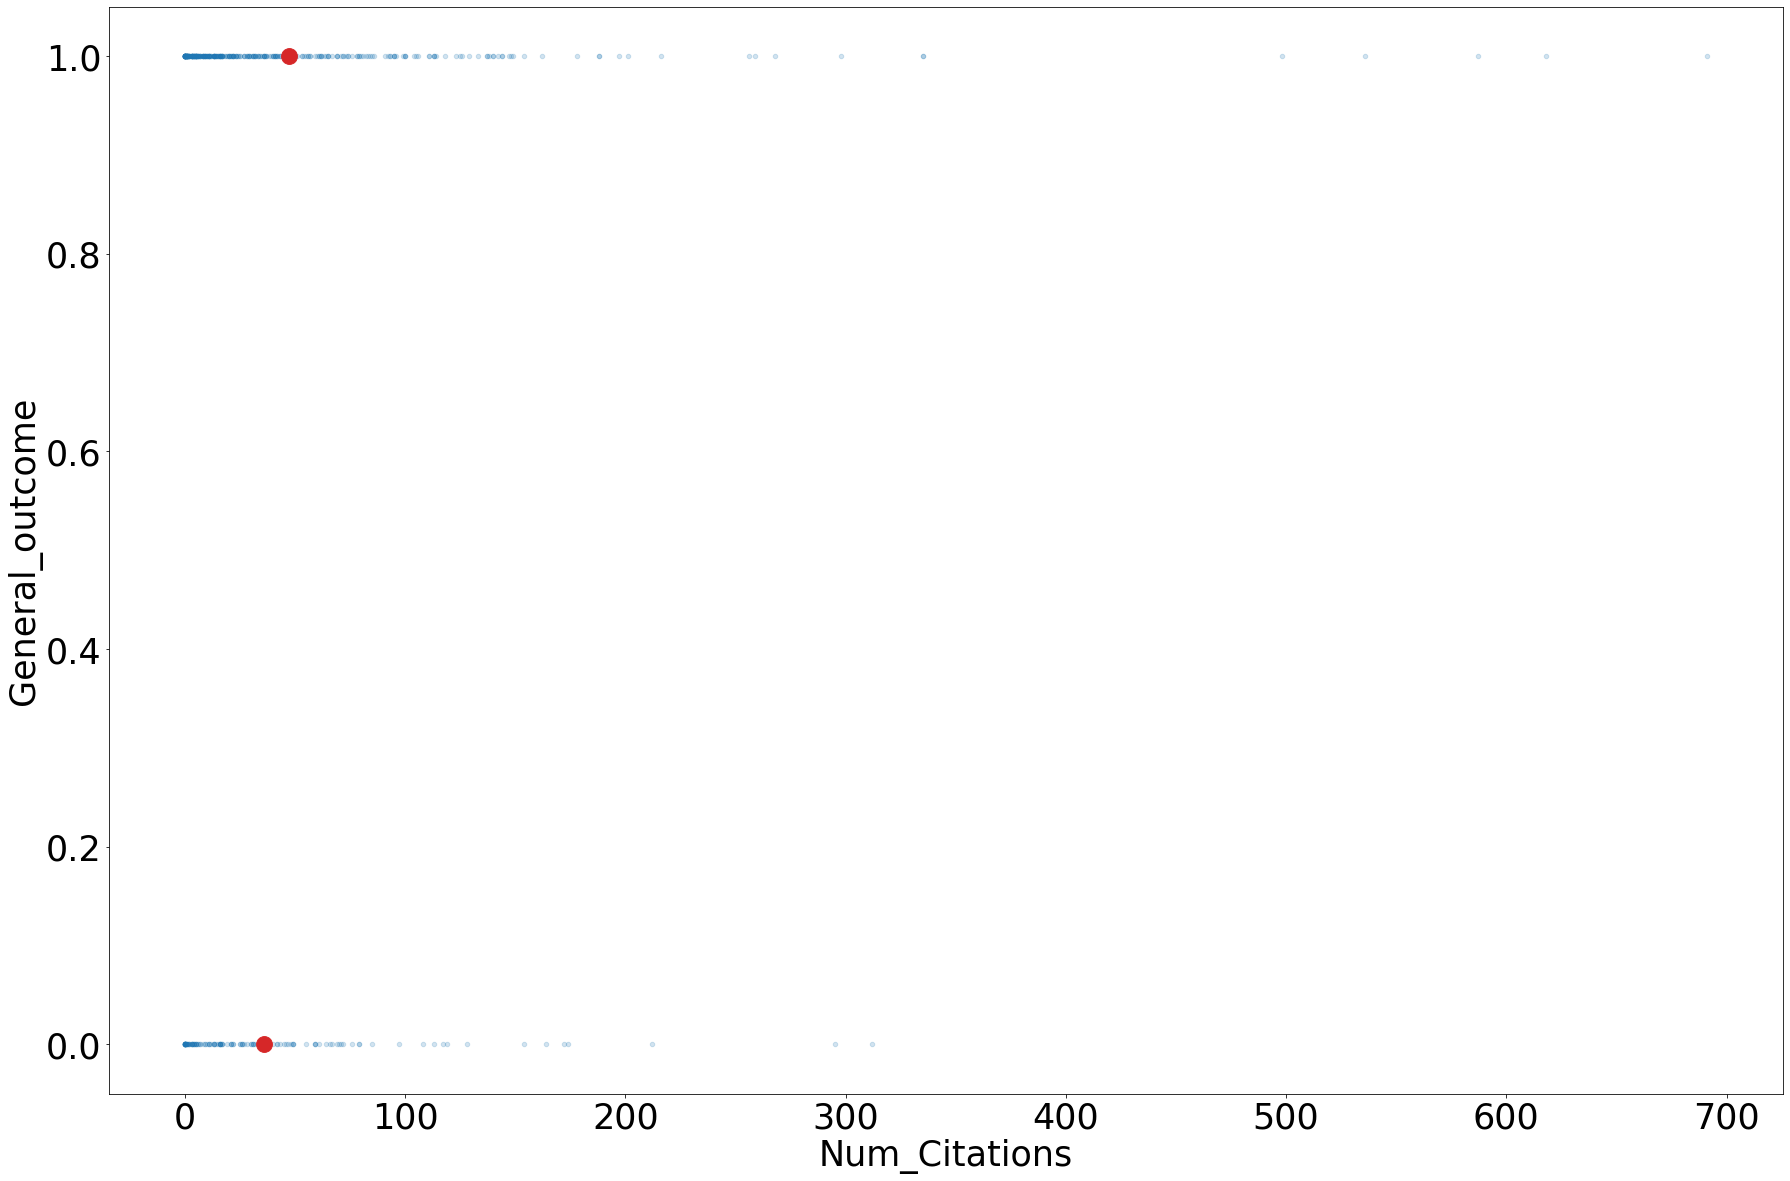

In [10]:
plt.rcParams["font.size"] = 35
fig,ax =plt.subplots(figsize = (30,20))
data.plot.scatter(x="Num_Citations", y = "General_outcome", alpha=.2, ax=ax)
ax.scatter(x = data["Num_Citations"][data["General_outcome"]==1].mean(), y=1, s = 250, c = "C3")
ax.scatter(x = data["Num_Citations"][data["General_outcome"]==0].mean(), y=0, s = 250, c = "C3")

Text(0.5, 1.0, 'Num_Citations')

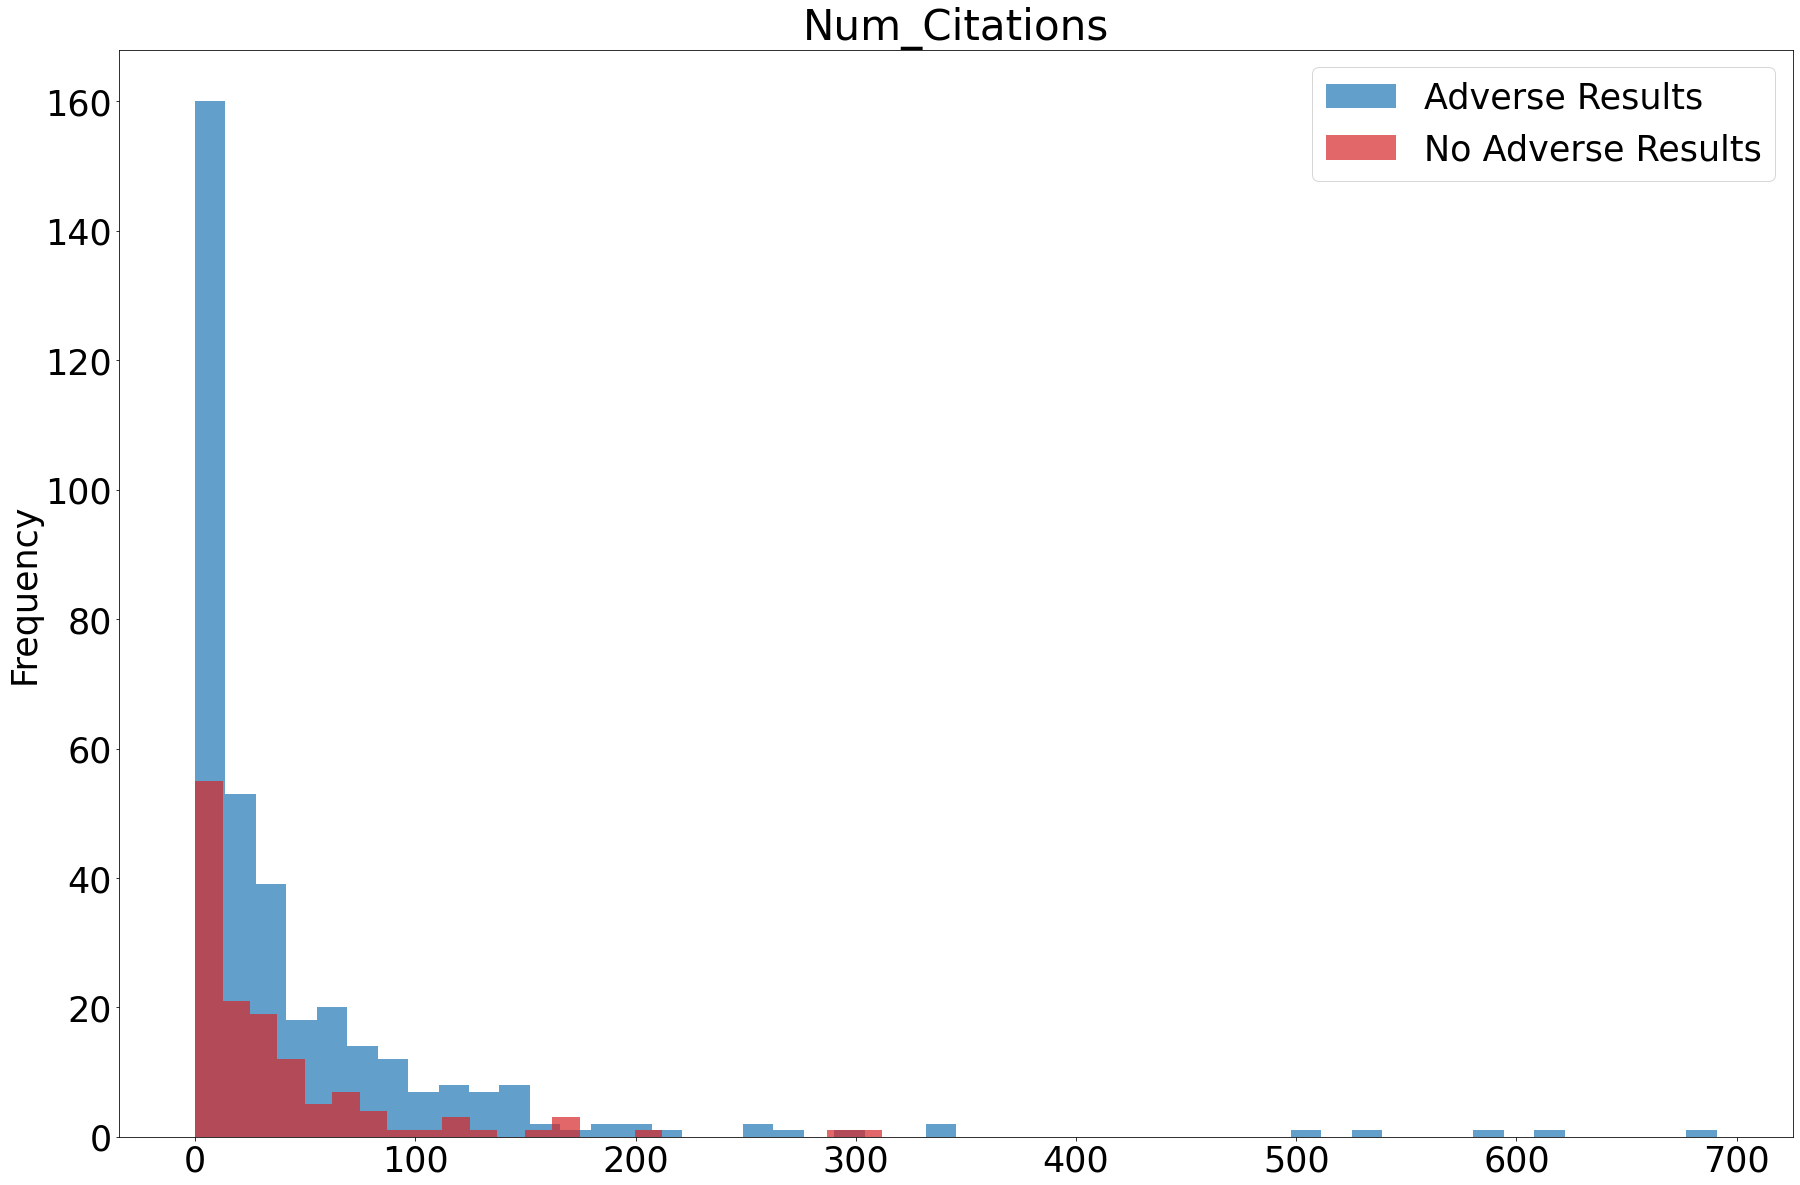

In [11]:
fig,ax =plt.subplots(figsize = (30,20))
data["Num_Citations"][data["General_outcome"]==1].plot.hist(alpha = .7,
                                                           color = "C0", ax = ax, bins = 50,
                                                          label = "Adverse Results")
data["Num_Citations"][data["General_outcome"]==0].plot.hist(alpha = .7, color = "C3", ax = ax, 
                                                           bins = 25, label = "No Adverse Results")
plt.legend()
plt.title("Num_Citations")

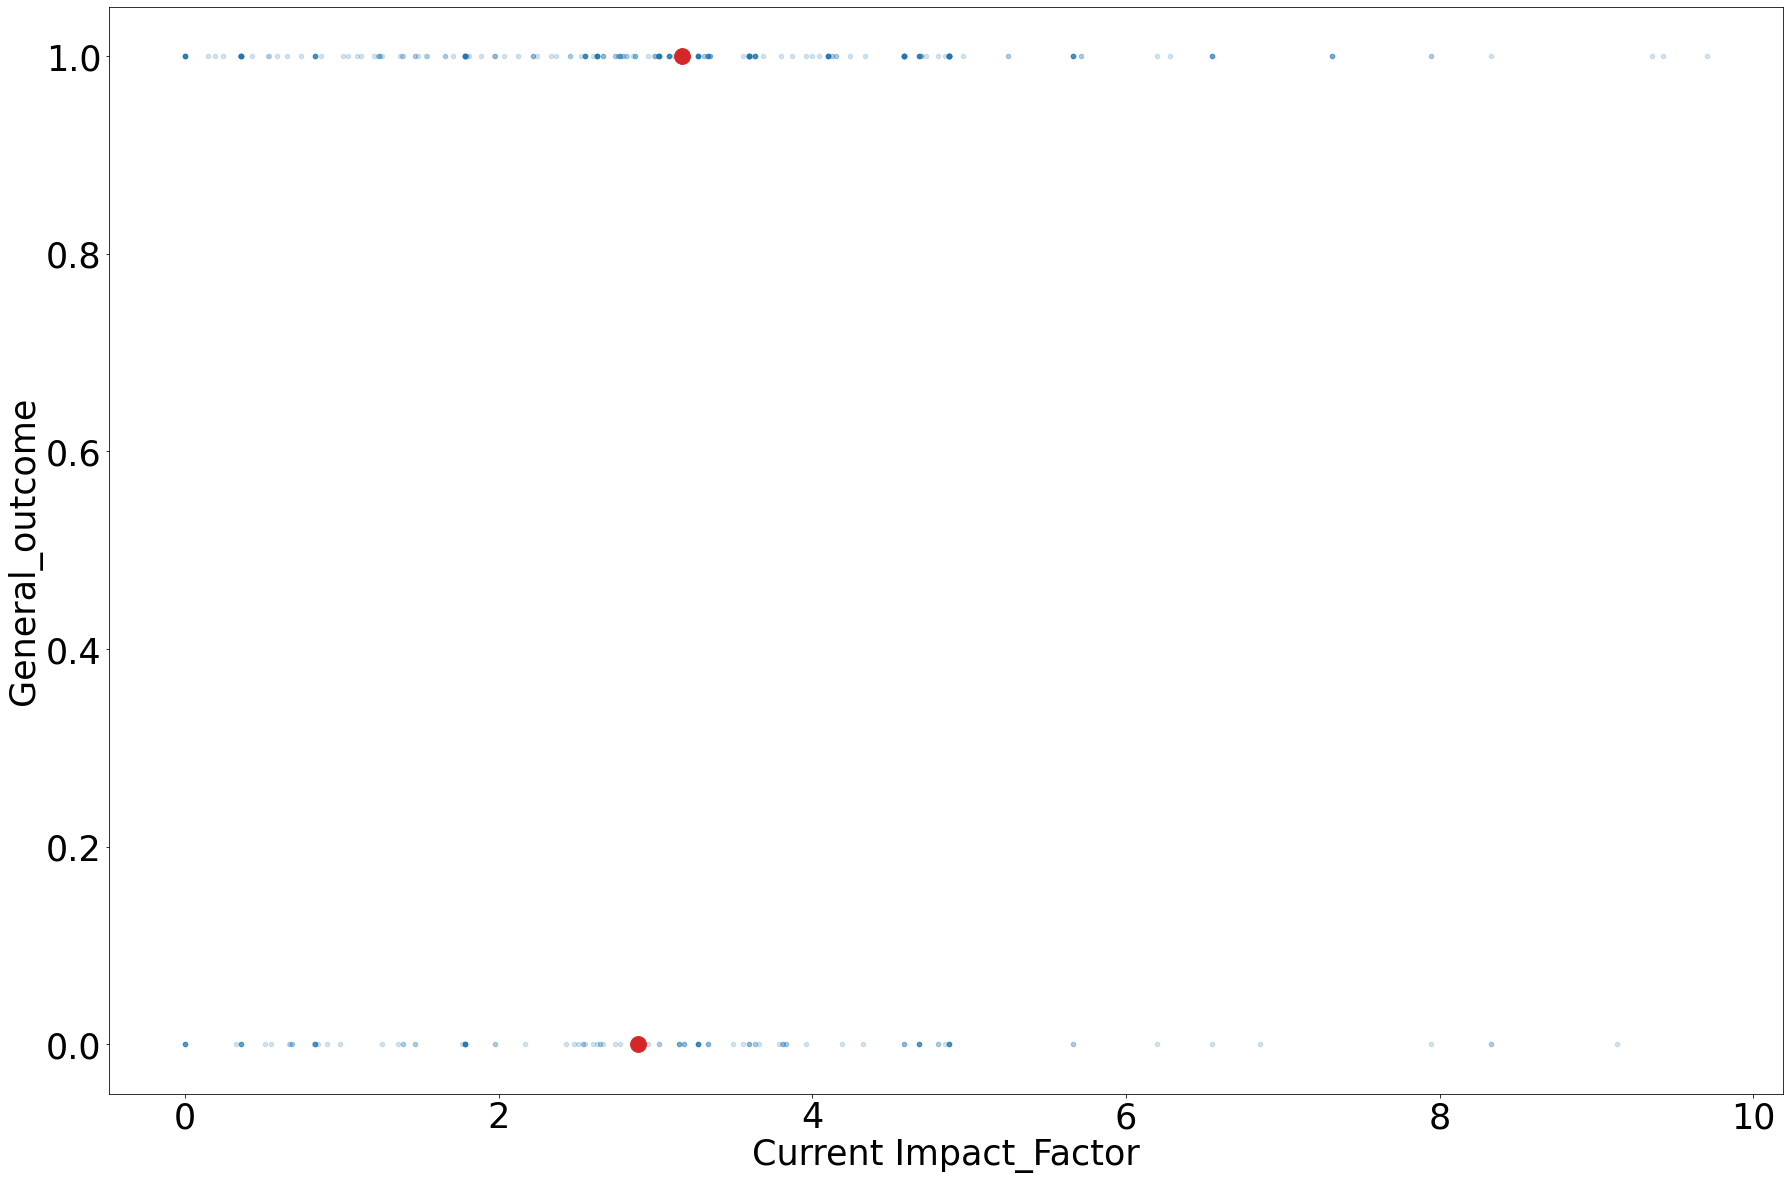

In [12]:
fig,ax =plt.subplots(figsize = (30,20))
data.plot.scatter(x="Current Impact_Factor", y = "General_outcome", alpha=.2, ax=ax)
ax.scatter(x = data["Current Impact_Factor"][data["General_outcome"]==1].mean(), y=1, s = 250, c = "C3")
ax.scatter(x = data["Current Impact_Factor"][data["General_outcome"]==0].mean(), y=0, s = 250, c = "C3")

In [41]:
data.iloc[200,"Impact_F_Publishing_Year"] = 0
data["Impact_F_Publishing_Year"] = pd.to_numeric(data["Impact_F_Publishing_Year"])

C:\Users\JLCat\AppData\Local\Temp/ipykernel_21612/4181899899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Impact_F_Publishing_Year"][200] = 0


Text(0.5, 1.0, 'Current Impact_Factor')

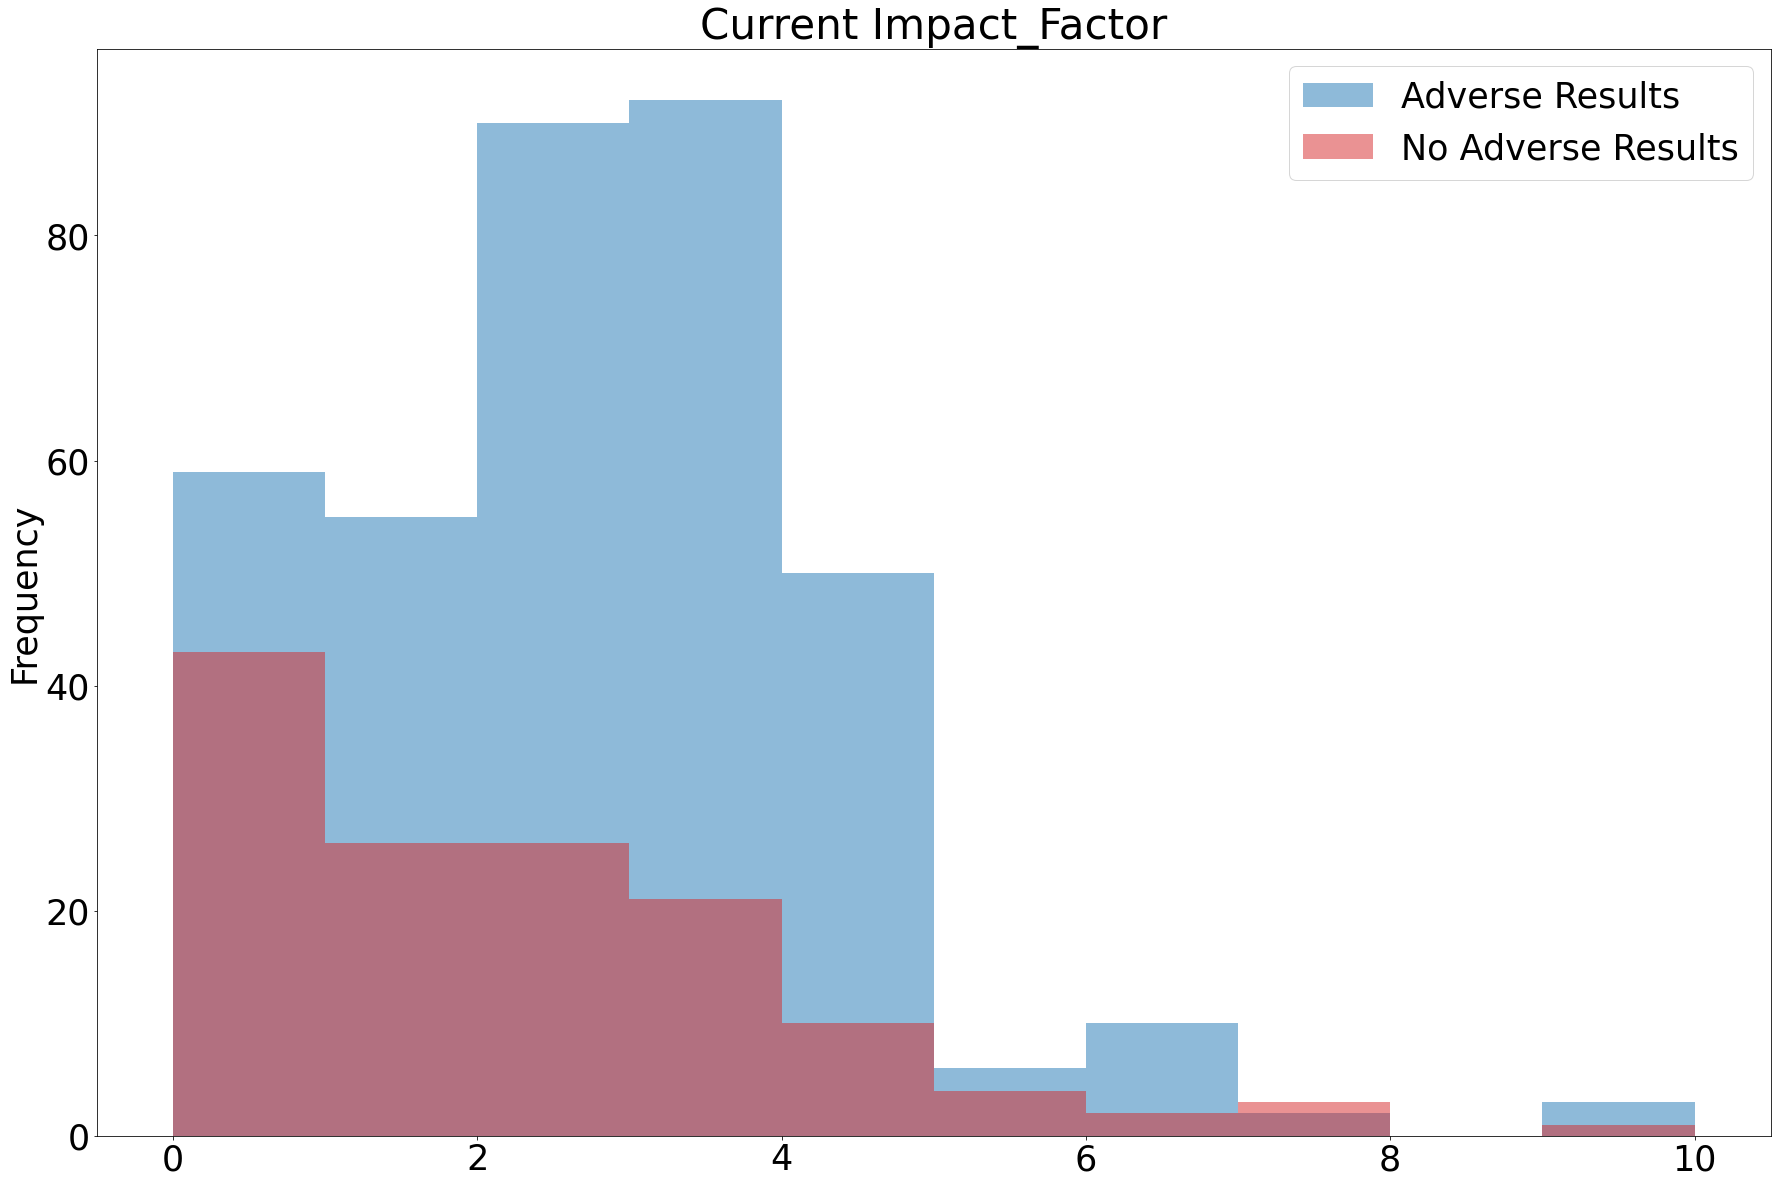

In [42]:
fig,ax =plt.subplots(figsize = (30,20))

data["Impact_F_Publishing_Year"].fillna(0)[data["General_outcome"]==1].plot.hist(alpha = .5,
                                                           color = "C0", ax = ax, bins = [0,1,2,3,4,5,6,7,8,9,10],
                                                          label = "Adverse Results")
data["Impact_F_Publishing_Year"].fillna(0)[data["General_outcome"]==0].plot.hist(alpha = .5, color = "C3", ax = ax, 
                                                           bins = [0,1,2,3,4,5,6,7,8,9,10], label = "No Adverse Results")
plt.legend()
plt.title("Current Impact_Factor")

In [36]:
data["Impact_F_Publishing_Year"].fillna(0).dtype

dtype('O')

In [ ]:
fig,ax =plt.subplots(figsize = (30,20))
data.plot.scatter(x="Year", y = "General_outcome", alpha =.1, ax=ax)

In [ ]:
# set view options to show entire dataframe
pd.set_option("max_rows", len(data.index))
pd.set_option("max_columns", len(data.columns))

In [ ]:
# show results by country
outcomes_by_country = data.groupby("Loc_experiment").mean()[["General_outcome"]]
outcomes_by_country["num_obs"] = data["Loc_experiment"].value_counts()

# sort by number of observations
outcomes_by_country.sort_values("num_obs", ascending = False)

In [ ]:
# sort by average of "Either_outcome"
outcomes_by_country.sort_values("General_outcome", ascending = False)

In [ ]:
data.groupby("Journal").mean()[[]]

In [ ]:
# Average Outcome by Journal - Sort by number of observations
outcomes_by_journal = data.groupby("Journal").mean()[["General_outcome"]]
outcomes_by_journal["num_obs"] = data["Journal"].value_counts()
outcomes_by_journal.sort_values("num_obs", ascending = False)

In [ ]:
### Kodjo start here 09232021
#journals = [list of journals to include]
# add to this list...
journals = ["Ecotoxicology and Environmental Safety"]
# Average Outcome by Journal - Sort by number of observations
top_journal_data = data[data["Journal"].isin(journals)]
data_before_2010 = top_journal_data[top_journal_data["Year"] < 2010]
data_after_2010 = top_journal_data[top_journal_data["Year"] >= 2010]

top_journal_data
# data_after_2010 = data[data["Year"] >= 2010]

# outcomes_by_journal_before_2010 = data_before_2010.groupby("Journal").mean()[["General_outcome"]]
# outcomes_by_journal_before_2010["num_obs"] = data_before_2010["Journal"].value_counts()
# outcomes_by_journal_before_2010.sort_values("num_obs", ascending = False)

# # make dataframe with data from after 2010
# outcomes_by_journal_after_2010 = data_after_2010.groupby("Journal").mean()[["General_outcome"]]
# outcomes_by_journal_after_2010["num_obs"] = data_after_2010["Journal"].value_counts()
# outcomes_by_journal_after_2010.sort_values("num_obs", ascending = False)


In [ ]:
fig, ax = plt.subplots(figsize = (25,10))
plt.title("Average Outcome by Journal")
ax.set_ylabel('Size: # Articles from Journal')
ax.set_yticks([])
ax.scatter(x = outcomes_by_journal_before_2010["General_outcome"], y = [0] * len(outcomes_by_journal_before_2010.index), 
            s = outcomes_by_journal_before_2010["num_obs"]*300, alpha = .3)
ax.scatter(x = outcomes_by_journal_after_2010["General_outcome"], y = [0] * len(outcomes_by_journal_after_2010.index), 
            s = outcomes_by_journal_after_2010["num_obs"]*300, alpha = .3, color = "C1")

# plot data after 2010 on same ax 

In [ ]:
# Average Outcome by Journal - Sort by Average Outcome
outcomes_by_journal.sort_values("General_outcome", ascending = False)

In [ ]:
# Average Outcome Value by Fund_Source
outcome_by_funding_agg = data.groupby("Fund_Source").mean()[["General_outcome"]]
outcome_by_funding_agg["num_obs"] =data["Fund_Source"].value_counts()
outcome_by_funding_agg.sort_values("General_outcome", ascending = False)

In [ ]:
# Average Outcome Value by Fund_source
outcomes_by_funding_particular = data.groupby("Fund_source").mean()[["General_outcome"]]
outcomes_by_funding_particular["num_obs"] = data["Fund_source"].value_counts()
outcomes_by_funding_particular

In [ ]:
import random
fig, ax = plt.subplots(figsize = (25,10))
plt.title("Average Outcome by Experiment Location")
ax.set_ylabel('Size: # Articles with \nExperiment in Location')
ax.set_yticks([])
plt.scatter(x = outcomes_by_country["General_outcome"], y = [0] * len(outcomes_by_country.index), 
            s = outcomes_by_country["num_obs"]*300, alpha = .3)

index= list(outcomes_by_country.sort_values("num_obs", ascending = False).index)
index = index[:10]
for ix in index:
    ax.text(outcomes_by_country["General_outcome"].loc[ix], 0, ix[:3], ha = "center" , va = "center", fontsize = 15)#-.004 + random.random()* 0.008,ix[:3], ha="center", fontsize = 15)

# Kodjo, I have grouped outcomes by country and year, and compared outcomes from each country to the mean outcomes forom the dataset that we have compiled.

# I have also included a list of journals, make similar visualizations with data accourding to each journal.

In [ ]:
data[data["USA"] ==1].groupby("Year").count()


In [ ]:
# positive results by year
data[data["USA"] ==1].groupby("Year").sum()["General_outcome"]


In [ ]:
# negative results by year
data[data["USA"] ==1].groupby("Year").count()["General_outcome"].sub(data[data["USA"] ==1].groupby("Year").sum()["General_outcome"])


In [ ]:
countries = sorted(nations)
years = sorted(list(set(data["Year"])))


In [ ]:
country = "ARGENTINA"
fig, ax = plt.subplots(figsize =(20,14))
other_countries = [c for c in countries if c != country]
data.groupby("Year").mean()["General_outcome"].plot.line(color = "k", linewidth = 10, alpha = .3, ax = ax)
data[data[country] == 1].groupby("Year").mean()["General_outcome"].plot.line(linewidth = 10, ax = ax)


#     mean_outcomes[country].plot.line(linewidth = 10, ax = ax)
for c in other_countries:
    data[data[c] == 1].groupby("Year").mean()["General_outcome"].plot.line(ls = " ", 
                                                                           marker = ".", 
                                                                           markersize = 30, 
                                                                           linewidth = 5, 
                                                                           color = "k", 
                                                                           alpha = .2, 
                                                                           ax = ax)
plt.title(country)
plt.show()
plt.close()

In [ ]:
for country in countries:
    fig, ax = plt.subplots(figsize =(20,14))
    other_countries = [c for c in countries if c != country]
    data.groupby("Year").mean()["General_outcome"].plot.line(color = "k", linewidth = 10, alpha = .3, ax = ax)
    data[data[country] == 1].groupby("Year").mean()["General_outcome"].plot.line(linewidth = 10, ax = ax)
    

#     mean_outcomes[country].plot.line(linewidth = 10, ax = ax)
    for c in other_countries:
        data[data[c] == 1].groupby("Year").mean()["General_outcome"].plot.line(ls = " ", marker = ".", markersize = 30, linewidth = 5, color = "k", alpha = .2, ax = ax)
    plt.title(country)
    plt.show()
    plt.close()


In [ ]:
journals = list(set(data["Journal"]))
years = sorted(list(set(data["Year"])))
data.groupby(["Journal","Year"]).mean()["General_outcome"]
